In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import time
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle
import platform
import os
os.chdir('/sfs/qumulo/qhome/bdr6qz/Documents/MSDS/DS6050')
from print_imps import print_importances, create_imp_df
from modeling import train_models
from model_comp import plot_model_performance

In [2]:
df = pd.read_csv('df_clean.csv')
labels = df.pop("mvp_share")
df_selected = pd.read_csv('df_selected.csv')
feature_names = list(df_selected.columns)

In [4]:
start_time = time.time()

trained_models, results, best_model_name, best_model = train_models(df_selected,
                                                                    df,
                                                                    labels,
                                                                    feature_names,
                                                                    label_col_name="mvp_share")

end_time = time.time()
execution_time = end_time - start_time
print(f"Model building execution time: {round(execution_time/60, 2)} minutes")

The objective has been evaluated at point [True, 10, None, 1, 2, 500] before, using random point [False, 7, None, 5, 7, 160]


Model building execution time: 4.69 minutes


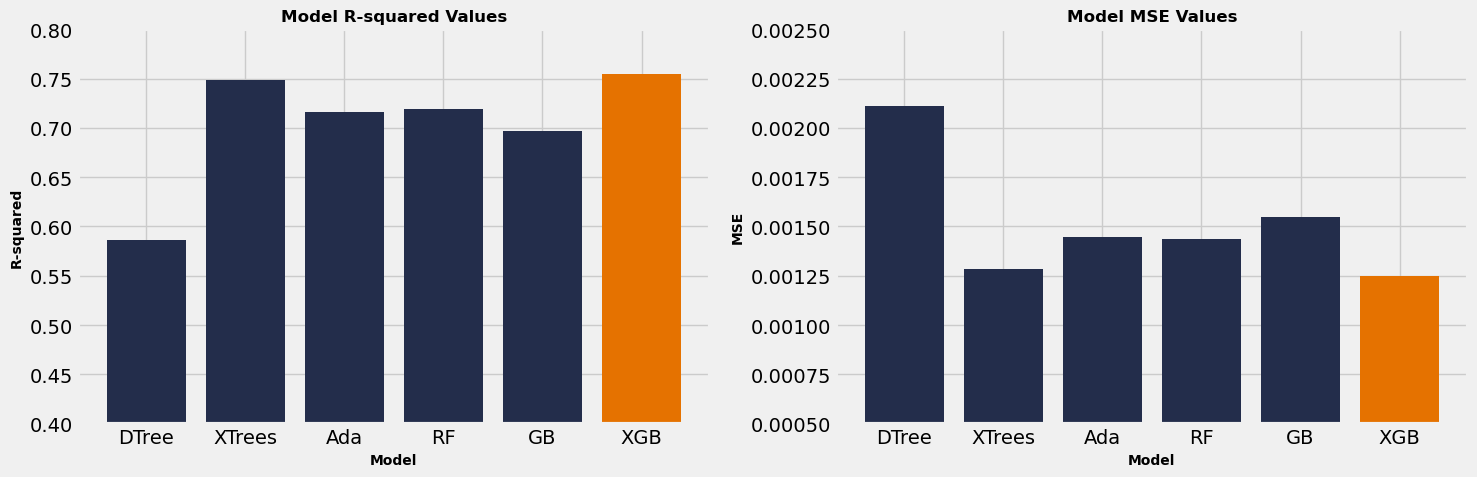

In [5]:
# Extract the model names, R-squared values, and MSE values from the results
model_names = list(results.keys())
r_sqs = [result["R-squared"] for result in results.values()]
MSE_s = [result["MSE"] for result in results.values()]

# Call the plotting function
plot_model_performance(model_names, r_sqs, MSE_s)

In [6]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']